In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU

Using TensorFlow backend.


## A) Loading the Dataset & Dividing into training & testing sets

In [2]:
dataset = pd.read_csv("powerline_dataset.csv")
dataset = dataset[['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']] # Since there were 2 additional noisy columns in csv

In [3]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

train_index, test_index = next(split.split(dataset, dataset['Output (S)']))
train_set, test_set = dataset.iloc[train_index], dataset.iloc[test_index]

## B) Training & Evaluating SVM, Decision Tree & Random Forest classifiers

### (i) SVM:

In [4]:
# Normalizing dataset before sending into SVM

scaler = StandardScaler()
scaler.fit(dataset.iloc[:, 1:])
train, test = train_set.to_numpy(), test_set.to_numpy()
train[:, 1:], test[:, 1:] = scaler.transform(train_set.iloc[:, 1:]), scaler.transform(test_set.iloc[:, 1:])

In [5]:
svm_clf = SVC(C=1000, kernel="rbf", random_state=42)
svm_clf.fit(train[:, 1:], train[:, 0])

SVC(C=1000, random_state=42)

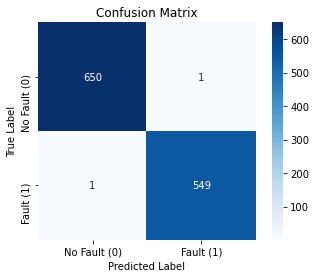

In [6]:
y_pred = svm_clf.predict(test[:, 1:])
y_test = test[:, 0]

conf_mat = confusion_matrix(y_test, y_pred)

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [7]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)

print("The Evaluation Metrics of the SVM Classifier (on the test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of the SVM Classifier (on the test set) is as follows:

True Positives: 549
True Negatives: 650
False Positives: 1
False Negatives: 1

Precision: 0.9981818181818182
Recall: 0.9981818181818182

Accuracy: 0.9983347210657785


### (ii) Decision Tree:

In [8]:
# Since only min_samples_leaf=1 gave the best result, Regularization was not required
tree_clf = DecisionTreeClassifier(max_depth=14, random_state=42)
tree_clf.fit(train_set.iloc[:, 1:], train_set.iloc[:, 0])

DecisionTreeClassifier(max_depth=14, random_state=42)

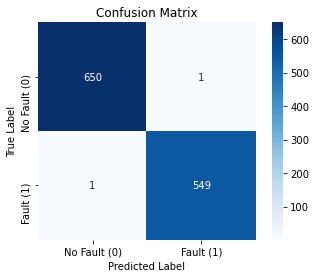

In [9]:
y_pred = tree_clf.predict(test_set.iloc[:, 1:])

conf_mat = confusion_matrix(y_test, y_pred)

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)

print("The Evaluation Metrics of the Decision Tree Classifier (on the test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of the Decision Tree Classifier (on the test set) is as follows:

True Positives: 549
True Negatives: 650
False Positives: 1
False Negatives: 1

Precision: 0.9981818181818182
Recall: 0.9981818181818182

Accuracy: 0.9983347210657785


### (iii) Random Forest:

In [11]:
forest_clf = RandomForestClassifier(n_estimators=162, random_state=42)
forest_clf.fit(train_set.iloc[:, 1:], train_set.iloc[:, 0])

RandomForestClassifier(n_estimators=162, random_state=42)

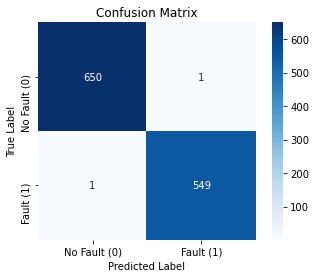

In [12]:
y_pred = forest_clf.predict(test_set.iloc[:, 1:])

conf_mat = confusion_matrix(y_test, y_pred)

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)

print("The Evaluation Metrics of the Random Forest Classifier (on the test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of the Random Forest Classifier (on the test set) is as follows:

True Positives: 549
True Negatives: 650
False Positives: 1
False Negatives: 1

Precision: 0.9981818181818182
Recall: 0.9981818181818182

Accuracy: 0.9983347210657785


### Comparision of the 3 models:
<br><br>
The observation is that all 3 models when **well tuned** gives the **exact same result**.<br>
Their accuracy, precision, recall and all parameters are same are are over 99.8%.<br><br>

The probably reasons for this are as follows:<br>
1) The given dataset is well balanced, and has less noises.<br>
2) The "StratifiedShuffleSplit" funstion of sklearn made sure that the classes are split evenly among the training anf testing set, further promoting the balance.<br><br>

The following tuning were done on each model:<br>
1) The SVM classifier performed poorly when linear, polynomial and SGD kernels were used giving an accuracy of only around 40% to 70%. But however when the "rbf" kernel was used the and the regularization parameter 'C' was set to 1000% the accuracy improved to more than 99.8%.<br>
2) The Decision Tree which was expected to give the least accuracy surprisingly gave the best result, since the correaltion between the attributes in the dataset was simple and pretty consistent. It is to be noted here that, there seemed to be no overfitting in the data, since increasing the 'min_samples_leaf' parameter to value over 1, actually cause the accuracy of the test set to reduce instead of increasing. And the best result was achived either by setting min_samples_leaf=1 or max_depth=14 or above.<br>
3) The Random Forest method gave the best accuaracy when 'n_estimators' was set at a value of 162 or above. The accuracy readuced when 'n_estimators' was set at a lower value.<br><br>

Hence my take on the best classifier is as follows:<br>
1) For this given simple dataset, "Decision Tree" is the best because it has the least time complexity for training compared to the other 2 methods, and gives the same accuracy as the other 2, without even requiring the dataset to be normalized.<br>
2) But for a lot conventinal datasets, when noise in dataset is present, or when the dataset is not well balanced, but not too complex, Random Forest may give a better performance.<br>
3) When the dataset is noisy and is complex, SVM with a proper regulaization constant, and "rbf" kernel may give the best result.

## C) Training & Evaluating MLP Models:

### (i) Model 1: (1 hidden layer, linear activation, SGD optimizer)

In [14]:
model = Sequential()
model.add(Dense(10, input_dim=6, activation='linear'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [15]:
model.fit(train[:, 1:], train[:, 0], epochs=500, batch_size=500, validation_split=0.15, verbose=2)

Train on 9180 samples, validate on 1620 samples
Epoch 1/500
 - 0s - loss: 0.7298 - accuracy: 0.4834 - val_loss: 0.7154 - val_accuracy: 0.5049
Epoch 2/500
 - 0s - loss: 0.7120 - accuracy: 0.4932 - val_loss: 0.7005 - val_accuracy: 0.5123
Epoch 3/500
 - 0s - loss: 0.7006 - accuracy: 0.5037 - val_loss: 0.6911 - val_accuracy: 0.5278
Epoch 4/500
 - 0s - loss: 0.6932 - accuracy: 0.5191 - val_loss: 0.6847 - val_accuracy: 0.5494
Epoch 5/500
 - 0s - loss: 0.6883 - accuracy: 0.5427 - val_loss: 0.6806 - val_accuracy: 0.5753
Epoch 6/500
 - 0s - loss: 0.6851 - accuracy: 0.5833 - val_loss: 0.6779 - val_accuracy: 0.6210
Epoch 7/500
 - 0s - loss: 0.6831 - accuracy: 0.6688 - val_loss: 0.6760 - val_accuracy: 0.7611
Epoch 8/500
 - 0s - loss: 0.6817 - accuracy: 0.7568 - val_loss: 0.6749 - val_accuracy: 0.7716
Epoch 9/500
 - 0s - loss: 0.6808 - accuracy: 0.7557 - val_loss: 0.6741 - val_accuracy: 0.7691
Epoch 10/500
 - 0s - loss: 0.6803 - accuracy: 0.7523 - val_loss: 0.6735 - val_accuracy: 0.7623
Epoch 11/50

Epoch 87/500
 - 0s - loss: 0.6788 - accuracy: 0.7321 - val_loss: 0.6718 - val_accuracy: 0.7444
Epoch 88/500
 - 0s - loss: 0.6788 - accuracy: 0.7321 - val_loss: 0.6719 - val_accuracy: 0.7432
Epoch 89/500
 - 0s - loss: 0.6788 - accuracy: 0.7302 - val_loss: 0.6719 - val_accuracy: 0.7432
Epoch 90/500
 - 0s - loss: 0.6788 - accuracy: 0.7309 - val_loss: 0.6718 - val_accuracy: 0.7426
Epoch 91/500
 - 0s - loss: 0.6788 - accuracy: 0.7297 - val_loss: 0.6718 - val_accuracy: 0.7420
Epoch 92/500
 - 0s - loss: 0.6788 - accuracy: 0.7291 - val_loss: 0.6718 - val_accuracy: 0.7420
Epoch 93/500
 - 0s - loss: 0.6788 - accuracy: 0.7296 - val_loss: 0.6719 - val_accuracy: 0.7407
Epoch 94/500
 - 0s - loss: 0.6788 - accuracy: 0.7284 - val_loss: 0.6718 - val_accuracy: 0.7420
Epoch 95/500
 - 0s - loss: 0.6788 - accuracy: 0.7290 - val_loss: 0.6719 - val_accuracy: 0.7438
Epoch 96/500
 - 0s - loss: 0.6788 - accuracy: 0.7322 - val_loss: 0.6718 - val_accuracy: 0.7444
Epoch 97/500
 - 0s - loss: 0.6788 - accuracy: 0.73

Epoch 173/500
 - 0s - loss: 0.6788 - accuracy: 0.7198 - val_loss: 0.6718 - val_accuracy: 0.7340
Epoch 174/500
 - 0s - loss: 0.6787 - accuracy: 0.7195 - val_loss: 0.6718 - val_accuracy: 0.7370
Epoch 175/500
 - 0s - loss: 0.6787 - accuracy: 0.7219 - val_loss: 0.6718 - val_accuracy: 0.7383
Epoch 176/500
 - 0s - loss: 0.6788 - accuracy: 0.7243 - val_loss: 0.6718 - val_accuracy: 0.7370
Epoch 177/500
 - 0s - loss: 0.6788 - accuracy: 0.7263 - val_loss: 0.6718 - val_accuracy: 0.7389
Epoch 178/500
 - 0s - loss: 0.6788 - accuracy: 0.7254 - val_loss: 0.6718 - val_accuracy: 0.7389
Epoch 179/500
 - 0s - loss: 0.6788 - accuracy: 0.7233 - val_loss: 0.6718 - val_accuracy: 0.7370
Epoch 180/500
 - 0s - loss: 0.6787 - accuracy: 0.7235 - val_loss: 0.6718 - val_accuracy: 0.7377
Epoch 181/500
 - 0s - loss: 0.6788 - accuracy: 0.7249 - val_loss: 0.6719 - val_accuracy: 0.7370
Epoch 182/500
 - 0s - loss: 0.6787 - accuracy: 0.7246 - val_loss: 0.6719 - val_accuracy: 0.7395
Epoch 183/500
 - 0s - loss: 0.6788 - acc

Epoch 259/500
 - 0s - loss: 0.6788 - accuracy: 0.7231 - val_loss: 0.6718 - val_accuracy: 0.7340
Epoch 260/500
 - 0s - loss: 0.6788 - accuracy: 0.7207 - val_loss: 0.6718 - val_accuracy: 0.7358
Epoch 261/500
 - 0s - loss: 0.6787 - accuracy: 0.7234 - val_loss: 0.6718 - val_accuracy: 0.7377
Epoch 262/500
 - 0s - loss: 0.6788 - accuracy: 0.7240 - val_loss: 0.6718 - val_accuracy: 0.7358
Epoch 263/500
 - 0s - loss: 0.6787 - accuracy: 0.7222 - val_loss: 0.6718 - val_accuracy: 0.7346
Epoch 264/500
 - 0s - loss: 0.6788 - accuracy: 0.7229 - val_loss: 0.6718 - val_accuracy: 0.7346
Epoch 265/500
 - 0s - loss: 0.6788 - accuracy: 0.7174 - val_loss: 0.6718 - val_accuracy: 0.7358
Epoch 266/500
 - 0s - loss: 0.6788 - accuracy: 0.7234 - val_loss: 0.6718 - val_accuracy: 0.7358
Epoch 267/500
 - 0s - loss: 0.6788 - accuracy: 0.7236 - val_loss: 0.6717 - val_accuracy: 0.7358
Epoch 268/500
 - 0s - loss: 0.6788 - accuracy: 0.7206 - val_loss: 0.6718 - val_accuracy: 0.7383
Epoch 269/500
 - 0s - loss: 0.6788 - acc

Epoch 345/500
 - 0s - loss: 0.6788 - accuracy: 0.7281 - val_loss: 0.6718 - val_accuracy: 0.7395
Epoch 346/500
 - 0s - loss: 0.6788 - accuracy: 0.7264 - val_loss: 0.6718 - val_accuracy: 0.7395
Epoch 347/500
 - 0s - loss: 0.6788 - accuracy: 0.7279 - val_loss: 0.6718 - val_accuracy: 0.7407
Epoch 348/500
 - 0s - loss: 0.6787 - accuracy: 0.7268 - val_loss: 0.6718 - val_accuracy: 0.7407
Epoch 349/500
 - 0s - loss: 0.6788 - accuracy: 0.7270 - val_loss: 0.6718 - val_accuracy: 0.7395
Epoch 350/500
 - 0s - loss: 0.6788 - accuracy: 0.7267 - val_loss: 0.6718 - val_accuracy: 0.7389
Epoch 351/500
 - 0s - loss: 0.6788 - accuracy: 0.7251 - val_loss: 0.6719 - val_accuracy: 0.7383
Epoch 352/500
 - 0s - loss: 0.6787 - accuracy: 0.7268 - val_loss: 0.6719 - val_accuracy: 0.7407
Epoch 353/500
 - 0s - loss: 0.6787 - accuracy: 0.7263 - val_loss: 0.6718 - val_accuracy: 0.7407
Epoch 354/500
 - 0s - loss: 0.6788 - accuracy: 0.7265 - val_loss: 0.6718 - val_accuracy: 0.7420
Epoch 355/500
 - 0s - loss: 0.6788 - acc

Epoch 431/500
 - 0s - loss: 0.6788 - accuracy: 0.7231 - val_loss: 0.6717 - val_accuracy: 0.7383
Epoch 432/500
 - 0s - loss: 0.6788 - accuracy: 0.7232 - val_loss: 0.6718 - val_accuracy: 0.7395
Epoch 433/500
 - 0s - loss: 0.6788 - accuracy: 0.7249 - val_loss: 0.6718 - val_accuracy: 0.7395
Epoch 434/500
 - 0s - loss: 0.6788 - accuracy: 0.7263 - val_loss: 0.6718 - val_accuracy: 0.7395
Epoch 435/500
 - 0s - loss: 0.6788 - accuracy: 0.7247 - val_loss: 0.6718 - val_accuracy: 0.7395
Epoch 436/500
 - 0s - loss: 0.6788 - accuracy: 0.7266 - val_loss: 0.6718 - val_accuracy: 0.7389
Epoch 437/500
 - 0s - loss: 0.6787 - accuracy: 0.7255 - val_loss: 0.6718 - val_accuracy: 0.7401
Epoch 438/500
 - 0s - loss: 0.6788 - accuracy: 0.7235 - val_loss: 0.6719 - val_accuracy: 0.7395
Epoch 439/500
 - 0s - loss: 0.6788 - accuracy: 0.7265 - val_loss: 0.6719 - val_accuracy: 0.7383
Epoch 440/500
 - 0s - loss: 0.6787 - accuracy: 0.7248 - val_loss: 0.6719 - val_accuracy: 0.7383
Epoch 441/500
 - 0s - loss: 0.6788 - acc

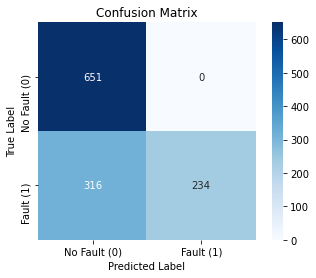

In [16]:
y_pred = model.predict(test[:, 1:]).reshape((-1,)) >= 0.5

conf_mat = confusion_matrix(y_test, y_pred)

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)

print("The Evaluation Metrics of MLP Model-1 (on the test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of MLP Model-1 (on the test set) is as follows:

True Positives: 234
True Negatives: 651
False Positives: 0
False Negatives: 316

Precision: 1.0
Recall: 0.4254545454545455

Accuracy: 0.7368859283930058


### (ii) Model 2: (1 hidden layer, relu activation, Adam optimizer)

In [18]:
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(train[:, 1:], train[:, 0], epochs=500, batch_size=500, verbose=2)

Epoch 1/500
 - 0s - loss: 0.7338 - accuracy: 0.4436
Epoch 2/500
 - 0s - loss: 0.6813 - accuracy: 0.4496
Epoch 3/500
 - 0s - loss: 0.6377 - accuracy: 0.4648
Epoch 4/500
 - 0s - loss: 0.6003 - accuracy: 0.5514
Epoch 5/500
 - 0s - loss: 0.5675 - accuracy: 0.6481
Epoch 6/500
 - 0s - loss: 0.5375 - accuracy: 0.7394
Epoch 7/500
 - 0s - loss: 0.5096 - accuracy: 0.8161
Epoch 8/500
 - 0s - loss: 0.4833 - accuracy: 0.8994
Epoch 9/500
 - 0s - loss: 0.4580 - accuracy: 0.9323
Epoch 10/500
 - 0s - loss: 0.4338 - accuracy: 0.9526
Epoch 11/500
 - 0s - loss: 0.4113 - accuracy: 0.9666
Epoch 12/500
 - 0s - loss: 0.3900 - accuracy: 0.9678
Epoch 13/500
 - 0s - loss: 0.3701 - accuracy: 0.9676
Epoch 14/500
 - 0s - loss: 0.3513 - accuracy: 0.9680
Epoch 15/500
 - 0s - loss: 0.3334 - accuracy: 0.9681
Epoch 16/500
 - 0s - loss: 0.3166 - accuracy: 0.9675
Epoch 17/500
 - 0s - loss: 0.3009 - accuracy: 0.9672
Epoch 18/500
 - 0s - loss: 0.2863 - accuracy: 0.9671
Epoch 19/500
 - 0s - loss: 0.2729 - accuracy: 0.9673
Ep

Epoch 155/500
 - 0s - loss: 0.0445 - accuracy: 0.9856
Epoch 156/500
 - 0s - loss: 0.0443 - accuracy: 0.9857
Epoch 157/500
 - 0s - loss: 0.0442 - accuracy: 0.9859
Epoch 158/500
 - 0s - loss: 0.0440 - accuracy: 0.9858
Epoch 159/500
 - 0s - loss: 0.0438 - accuracy: 0.9859
Epoch 160/500
 - 0s - loss: 0.0436 - accuracy: 0.9861
Epoch 161/500
 - 0s - loss: 0.0434 - accuracy: 0.9862
Epoch 162/500
 - 0s - loss: 0.0432 - accuracy: 0.9865
Epoch 163/500
 - 0s - loss: 0.0431 - accuracy: 0.9865
Epoch 164/500
 - 0s - loss: 0.0429 - accuracy: 0.9866
Epoch 165/500
 - 0s - loss: 0.0428 - accuracy: 0.9868
Epoch 166/500
 - 0s - loss: 0.0426 - accuracy: 0.9868
Epoch 167/500
 - 0s - loss: 0.0424 - accuracy: 0.9869
Epoch 168/500
 - 0s - loss: 0.0423 - accuracy: 0.9869
Epoch 169/500
 - 0s - loss: 0.0421 - accuracy: 0.9870
Epoch 170/500
 - 0s - loss: 0.0420 - accuracy: 0.9870
Epoch 171/500
 - 0s - loss: 0.0418 - accuracy: 0.9869
Epoch 172/500
 - 0s - loss: 0.0417 - accuracy: 0.9870
Epoch 173/500
 - 0s - loss: 

Epoch 307/500
 - 0s - loss: 0.0324 - accuracy: 0.9899
Epoch 308/500
 - 0s - loss: 0.0324 - accuracy: 0.9898
Epoch 309/500
 - 0s - loss: 0.0323 - accuracy: 0.9899
Epoch 310/500
 - 0s - loss: 0.0323 - accuracy: 0.9899
Epoch 311/500
 - 0s - loss: 0.0323 - accuracy: 0.9899
Epoch 312/500
 - 0s - loss: 0.0322 - accuracy: 0.9899
Epoch 313/500
 - 0s - loss: 0.0322 - accuracy: 0.9899
Epoch 314/500
 - 0s - loss: 0.0322 - accuracy: 0.9901
Epoch 315/500
 - 0s - loss: 0.0322 - accuracy: 0.9899
Epoch 316/500
 - 0s - loss: 0.0321 - accuracy: 0.9901
Epoch 317/500
 - 0s - loss: 0.0321 - accuracy: 0.9901
Epoch 318/500
 - 0s - loss: 0.0321 - accuracy: 0.9901
Epoch 319/500
 - 0s - loss: 0.0322 - accuracy: 0.9898
Epoch 320/500
 - 0s - loss: 0.0320 - accuracy: 0.9900
Epoch 321/500
 - 0s - loss: 0.0320 - accuracy: 0.9901
Epoch 322/500
 - 0s - loss: 0.0320 - accuracy: 0.9901
Epoch 323/500
 - 0s - loss: 0.0319 - accuracy: 0.9901
Epoch 324/500
 - 0s - loss: 0.0319 - accuracy: 0.9900
Epoch 325/500
 - 0s - loss: 

Epoch 459/500
 - 0s - loss: 0.0281 - accuracy: 0.9913
Epoch 460/500
 - 0s - loss: 0.0282 - accuracy: 0.9911
Epoch 461/500
 - 0s - loss: 0.0281 - accuracy: 0.9914
Epoch 462/500
 - 0s - loss: 0.0281 - accuracy: 0.9912
Epoch 463/500
 - 0s - loss: 0.0281 - accuracy: 0.9913
Epoch 464/500
 - 0s - loss: 0.0280 - accuracy: 0.9911
Epoch 465/500
 - 0s - loss: 0.0280 - accuracy: 0.9912
Epoch 466/500
 - 0s - loss: 0.0280 - accuracy: 0.9914
Epoch 467/500
 - 0s - loss: 0.0279 - accuracy: 0.9915
Epoch 468/500
 - 0s - loss: 0.0279 - accuracy: 0.9912
Epoch 469/500
 - 0s - loss: 0.0279 - accuracy: 0.9911
Epoch 470/500
 - 0s - loss: 0.0279 - accuracy: 0.9913
Epoch 471/500
 - 0s - loss: 0.0278 - accuracy: 0.9913
Epoch 472/500
 - 0s - loss: 0.0279 - accuracy: 0.9915
Epoch 473/500
 - 0s - loss: 0.0278 - accuracy: 0.9913
Epoch 474/500
 - 0s - loss: 0.0278 - accuracy: 0.9911
Epoch 475/500
 - 0s - loss: 0.0278 - accuracy: 0.9916
Epoch 476/500
 - 0s - loss: 0.0278 - accuracy: 0.9915
Epoch 477/500
 - 0s - loss: 

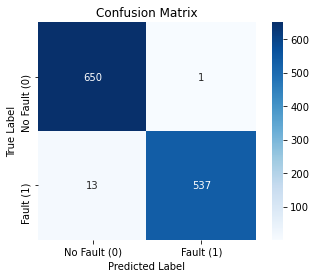

In [20]:
y_pred = model.predict(test[:, 1:]).reshape((-1,)) >= 0.5

conf_mat = confusion_matrix(y_test, y_pred)

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)

print("The Evaluation Metrics of the MLP Model-2 (on the test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of the MLP Model-2 (on the test set) is as follows:

True Positives: 537
True Negatives: 650
False Positives: 1
False Negatives: 13

Precision: 0.9981412639405205
Recall: 0.9763636363636363

Accuracy: 0.9883430474604497


### (iii) Model 3: (1 hidden layer, LeakyReLU activation, RMSprop optimizer)

In [22]:
model = Sequential()
model.add(Dense(10, input_dim=6))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [23]:
model.fit(train[:, 1:], train[:, 0], epochs=500, batch_size=500, verbose=2)

Epoch 1/500
 - 0s - loss: 0.7502 - accuracy: 0.5019
Epoch 2/500
 - 0s - loss: 0.6917 - accuracy: 0.5532
Epoch 3/500
 - 0s - loss: 0.6435 - accuracy: 0.6111
Epoch 4/500
 - 0s - loss: 0.5993 - accuracy: 0.6676
Epoch 5/500
 - 0s - loss: 0.5575 - accuracy: 0.7006
Epoch 6/500
 - 0s - loss: 0.5185 - accuracy: 0.7342
Epoch 7/500
 - 0s - loss: 0.4828 - accuracy: 0.8281
Epoch 8/500
 - 0s - loss: 0.4498 - accuracy: 0.8690
Epoch 9/500
 - 0s - loss: 0.4200 - accuracy: 0.8811
Epoch 10/500
 - 0s - loss: 0.3923 - accuracy: 0.8836
Epoch 11/500
 - 0s - loss: 0.3663 - accuracy: 0.8912
Epoch 12/500
 - 0s - loss: 0.3420 - accuracy: 0.9053
Epoch 13/500
 - 0s - loss: 0.3195 - accuracy: 0.9156
Epoch 14/500
 - 0s - loss: 0.2994 - accuracy: 0.9238
Epoch 15/500
 - 0s - loss: 0.2808 - accuracy: 0.9286
Epoch 16/500
 - 0s - loss: 0.2634 - accuracy: 0.9320
Epoch 17/500
 - 0s - loss: 0.2469 - accuracy: 0.9366
Epoch 18/500
 - 0s - loss: 0.2316 - accuracy: 0.9391
Epoch 19/500
 - 0s - loss: 0.2176 - accuracy: 0.9432
Ep

Epoch 155/500
 - 0s - loss: 0.0269 - accuracy: 0.9904
Epoch 156/500
 - 0s - loss: 0.0268 - accuracy: 0.9905
Epoch 157/500
 - 0s - loss: 0.0267 - accuracy: 0.9903
Epoch 158/500
 - 0s - loss: 0.0266 - accuracy: 0.9906
Epoch 159/500
 - 0s - loss: 0.0265 - accuracy: 0.9905
Epoch 160/500
 - 0s - loss: 0.0265 - accuracy: 0.9906
Epoch 161/500
 - 0s - loss: 0.0264 - accuracy: 0.9906
Epoch 162/500
 - 0s - loss: 0.0263 - accuracy: 0.9906
Epoch 163/500
 - 0s - loss: 0.0263 - accuracy: 0.9905
Epoch 164/500
 - 0s - loss: 0.0262 - accuracy: 0.9906
Epoch 165/500
 - 0s - loss: 0.0261 - accuracy: 0.9907
Epoch 166/500
 - 0s - loss: 0.0261 - accuracy: 0.9907
Epoch 167/500
 - 0s - loss: 0.0260 - accuracy: 0.9906
Epoch 168/500
 - 0s - loss: 0.0260 - accuracy: 0.9906
Epoch 169/500
 - 0s - loss: 0.0259 - accuracy: 0.9909
Epoch 170/500
 - 0s - loss: 0.0258 - accuracy: 0.9906
Epoch 171/500
 - 0s - loss: 0.0258 - accuracy: 0.9911
Epoch 172/500
 - 0s - loss: 0.0257 - accuracy: 0.9909
Epoch 173/500
 - 0s - loss: 

Epoch 307/500
 - 0s - loss: 0.0210 - accuracy: 0.9922
Epoch 308/500
 - 0s - loss: 0.0209 - accuracy: 0.9921
Epoch 309/500
 - 0s - loss: 0.0209 - accuracy: 0.9920
Epoch 310/500
 - 0s - loss: 0.0209 - accuracy: 0.9923
Epoch 311/500
 - 0s - loss: 0.0209 - accuracy: 0.9923
Epoch 312/500
 - 0s - loss: 0.0208 - accuracy: 0.9922
Epoch 313/500
 - 0s - loss: 0.0208 - accuracy: 0.9920
Epoch 314/500
 - 0s - loss: 0.0208 - accuracy: 0.9924
Epoch 315/500
 - 0s - loss: 0.0208 - accuracy: 0.9923
Epoch 316/500
 - 0s - loss: 0.0207 - accuracy: 0.9923
Epoch 317/500
 - 0s - loss: 0.0207 - accuracy: 0.9921
Epoch 318/500
 - 0s - loss: 0.0207 - accuracy: 0.9923
Epoch 319/500
 - 0s - loss: 0.0207 - accuracy: 0.9923
Epoch 320/500
 - 0s - loss: 0.0207 - accuracy: 0.9921
Epoch 321/500
 - 0s - loss: 0.0207 - accuracy: 0.9922
Epoch 322/500
 - 0s - loss: 0.0206 - accuracy: 0.9922
Epoch 323/500
 - 0s - loss: 0.0206 - accuracy: 0.9921
Epoch 324/500
 - 0s - loss: 0.0206 - accuracy: 0.9922
Epoch 325/500
 - 0s - loss: 

Epoch 459/500
 - 0s - loss: 0.0167 - accuracy: 0.9931
Epoch 460/500
 - 0s - loss: 0.0167 - accuracy: 0.9928
Epoch 461/500
 - 0s - loss: 0.0166 - accuracy: 0.9931
Epoch 462/500
 - 0s - loss: 0.0166 - accuracy: 0.9927
Epoch 463/500
 - 0s - loss: 0.0166 - accuracy: 0.9930
Epoch 464/500
 - 0s - loss: 0.0166 - accuracy: 0.9931
Epoch 465/500
 - 0s - loss: 0.0166 - accuracy: 0.9931
Epoch 466/500
 - 0s - loss: 0.0165 - accuracy: 0.9931
Epoch 467/500
 - 0s - loss: 0.0165 - accuracy: 0.9932
Epoch 468/500
 - 0s - loss: 0.0165 - accuracy: 0.9931
Epoch 469/500
 - 0s - loss: 0.0165 - accuracy: 0.9930
Epoch 470/500
 - 0s - loss: 0.0164 - accuracy: 0.9931
Epoch 471/500
 - 0s - loss: 0.0164 - accuracy: 0.9930
Epoch 472/500
 - 0s - loss: 0.0164 - accuracy: 0.9933
Epoch 473/500
 - 0s - loss: 0.0164 - accuracy: 0.9931
Epoch 474/500
 - 0s - loss: 0.0164 - accuracy: 0.9933
Epoch 475/500
 - 0s - loss: 0.0164 - accuracy: 0.9933
Epoch 476/500
 - 0s - loss: 0.0164 - accuracy: 0.9933
Epoch 477/500
 - 0s - loss: 

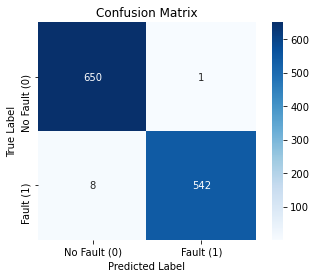

In [24]:
y_pred = model.predict(test[:, 1:]).reshape((-1,)) >= 0.5

conf_mat = confusion_matrix(y_test, y_pred)

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)

print("The Evaluation Metrics of the MLP Model-3 (on the test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of the MLP Model-3 (on the test set) is as follows:

True Positives: 542
True Negatives: 650
False Positives: 1
False Negatives: 8

Precision: 0.998158379373849
Recall: 0.9854545454545455

Accuracy: 0.9925062447960034


### (iv) Model 4: (2 hidden layers, relu activation, RMSprop optimizer)

In [26]:
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [27]:
model.fit(train[:, 1:], train[:, 0], epochs=500, batch_size=500, verbose=2)

Epoch 1/500
 - 0s - loss: 0.6790 - accuracy: 0.6061
Epoch 2/500
 - 0s - loss: 0.6136 - accuracy: 0.7532
Epoch 3/500
 - 0s - loss: 0.5536 - accuracy: 0.8138
Epoch 4/500
 - 0s - loss: 0.4948 - accuracy: 0.8456
Epoch 5/500
 - 0s - loss: 0.4371 - accuracy: 0.8845
Epoch 6/500
 - 0s - loss: 0.3814 - accuracy: 0.9106
Epoch 7/500
 - 0s - loss: 0.3290 - accuracy: 0.9306
Epoch 8/500
 - 0s - loss: 0.2818 - accuracy: 0.9419
Epoch 9/500
 - 0s - loss: 0.2403 - accuracy: 0.9476
Epoch 10/500
 - 0s - loss: 0.2059 - accuracy: 0.9519
Epoch 11/500
 - 0s - loss: 0.1773 - accuracy: 0.9557
Epoch 12/500
 - 0s - loss: 0.1537 - accuracy: 0.9598
Epoch 13/500
 - 0s - loss: 0.1343 - accuracy: 0.9636
Epoch 14/500
 - 0s - loss: 0.1187 - accuracy: 0.9656
Epoch 15/500
 - 0s - loss: 0.1056 - accuracy: 0.9691
Epoch 16/500
 - 0s - loss: 0.0948 - accuracy: 0.9710
Epoch 17/500
 - 0s - loss: 0.0856 - accuracy: 0.9737
Epoch 18/500
 - 0s - loss: 0.0781 - accuracy: 0.9759
Epoch 19/500
 - 0s - loss: 0.0718 - accuracy: 0.9771
Ep

Epoch 155/500
 - 0s - loss: 0.0135 - accuracy: 0.9942
Epoch 156/500
 - 0s - loss: 0.0135 - accuracy: 0.9944
Epoch 157/500
 - 0s - loss: 0.0134 - accuracy: 0.9943
Epoch 158/500
 - 0s - loss: 0.0132 - accuracy: 0.9945
Epoch 159/500
 - 0s - loss: 0.0133 - accuracy: 0.9945
Epoch 160/500
 - 0s - loss: 0.0131 - accuracy: 0.9945
Epoch 161/500
 - 0s - loss: 0.0131 - accuracy: 0.9943
Epoch 162/500
 - 0s - loss: 0.0132 - accuracy: 0.9942
Epoch 163/500
 - 0s - loss: 0.0130 - accuracy: 0.9945
Epoch 164/500
 - 0s - loss: 0.0131 - accuracy: 0.9943
Epoch 165/500
 - 0s - loss: 0.0130 - accuracy: 0.9945
Epoch 166/500
 - 0s - loss: 0.0130 - accuracy: 0.9944
Epoch 167/500
 - 0s - loss: 0.0129 - accuracy: 0.9946
Epoch 168/500
 - 0s - loss: 0.0129 - accuracy: 0.9946
Epoch 169/500
 - 0s - loss: 0.0127 - accuracy: 0.9944
Epoch 170/500
 - 0s - loss: 0.0128 - accuracy: 0.9948
Epoch 171/500
 - 0s - loss: 0.0126 - accuracy: 0.9944
Epoch 172/500
 - 0s - loss: 0.0126 - accuracy: 0.9944
Epoch 173/500
 - 0s - loss: 

Epoch 307/500
 - 0s - loss: 0.0087 - accuracy: 0.9963
Epoch 308/500
 - 0s - loss: 0.0089 - accuracy: 0.9959
Epoch 309/500
 - 0s - loss: 0.0088 - accuracy: 0.9962
Epoch 310/500
 - 0s - loss: 0.0087 - accuracy: 0.9961
Epoch 311/500
 - 0s - loss: 0.0086 - accuracy: 0.9963
Epoch 312/500
 - 0s - loss: 0.0089 - accuracy: 0.9961
Epoch 313/500
 - 0s - loss: 0.0087 - accuracy: 0.9963
Epoch 314/500
 - 0s - loss: 0.0084 - accuracy: 0.9964
Epoch 315/500
 - 0s - loss: 0.0087 - accuracy: 0.9960
Epoch 316/500
 - 0s - loss: 0.0086 - accuracy: 0.9962
Epoch 317/500
 - 0s - loss: 0.0083 - accuracy: 0.9967
Epoch 318/500
 - 0s - loss: 0.0085 - accuracy: 0.9962
Epoch 319/500
 - 0s - loss: 0.0084 - accuracy: 0.9965
Epoch 320/500
 - 0s - loss: 0.0086 - accuracy: 0.9962
Epoch 321/500
 - 0s - loss: 0.0084 - accuracy: 0.9961
Epoch 322/500
 - 0s - loss: 0.0086 - accuracy: 0.9969
Epoch 323/500
 - 0s - loss: 0.0084 - accuracy: 0.9965
Epoch 324/500
 - 0s - loss: 0.0084 - accuracy: 0.9966
Epoch 325/500
 - 0s - loss: 

Epoch 459/500
 - 0s - loss: 0.0069 - accuracy: 0.9975
Epoch 460/500
 - 0s - loss: 0.0068 - accuracy: 0.9974
Epoch 461/500
 - 0s - loss: 0.0070 - accuracy: 0.9972
Epoch 462/500
 - 0s - loss: 0.0069 - accuracy: 0.9969
Epoch 463/500
 - 0s - loss: 0.0069 - accuracy: 0.9974
Epoch 464/500
 - 0s - loss: 0.0071 - accuracy: 0.9972
Epoch 465/500
 - 0s - loss: 0.0069 - accuracy: 0.9975
Epoch 466/500
 - 0s - loss: 0.0068 - accuracy: 0.9975
Epoch 467/500
 - 0s - loss: 0.0069 - accuracy: 0.9975
Epoch 468/500
 - 0s - loss: 0.0070 - accuracy: 0.9973
Epoch 469/500
 - 0s - loss: 0.0067 - accuracy: 0.9974
Epoch 470/500
 - 0s - loss: 0.0071 - accuracy: 0.9971
Epoch 471/500
 - 0s - loss: 0.0068 - accuracy: 0.9975
Epoch 472/500
 - 0s - loss: 0.0070 - accuracy: 0.9969
Epoch 473/500
 - 0s - loss: 0.0069 - accuracy: 0.9973
Epoch 474/500
 - 0s - loss: 0.0068 - accuracy: 0.9973
Epoch 475/500
 - 0s - loss: 0.0067 - accuracy: 0.9975
Epoch 476/500
 - 0s - loss: 0.0067 - accuracy: 0.9973
Epoch 477/500
 - 0s - loss: 

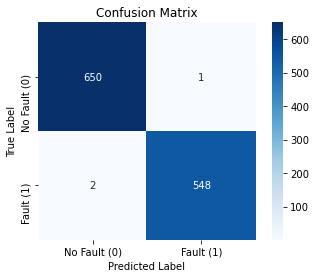

In [28]:
y_pred = model.predict(test[:, 1:]).reshape((-1,)) >= 0.5

conf_mat = confusion_matrix(y_test, y_pred)

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)

print("The Evaluation Metrics of the MLP Model-4 (on the test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of the MLP Model-4 (on the test set) is as follows:

True Positives: 548
True Negatives: 650
False Positives: 1
False Negatives: 2

Precision: 0.9981785063752276
Recall: 0.9963636363636363

Accuracy: 0.9975020815986678


## D) Results & Inferences:

The results of all the 7 models is as follows:<br><br>

Well tuned SVM, Decision Tree & Random Forest: Tie with **99.83% accuracy**<br>
MLP Model 1: **73.68% accuracy**<br>
MLP Model 2: **98.83% accuracy**<br>
MLP Model 3: **99.25% accuracy**<br>
MLP Model 4: **99.75% accuracy**<br><br>

Performance of models & Reasons for performance:<br><br>

(i) MLP vs non-MLP:<br>
- It can be seen that, that highest accuracy is obtained from the non-MLP models, i.e. the SVM, Decision Tree & Random Forest. But that is expected to be the case only with this dataset and less likely to be applicable to conventional datasets.<br>
- The reason for the non-NLP methods to outperform NLP methods, is since this is a simple dataset where the data has very less noise and is well balanced. Since neural networks tend to more exhibit the nature of function approximators, it is less likely to reach 100% accuracy in any case, and the 99.75% accuracy accomplished is good already.<br>
- In case of datasets, where the accuracy accomplished by non-MLP methods is less than 80%, MLPs are very likely to exhibit a better performance than them.<br><br>

(ii) Comparision b/w MLP models:<br>
- For all models, I have set only 10 perceptrons per layer since, the performance did not improve when the count is increased beyond that. And for the sake of fair comparision of the activation functions & optimizers I kept the perceptrons count the same. Also the final layer was always 'sigmoid' and 'binary_crossentropy' loss since this is a binary classification problem.<br>
- From MLP Model-1, it was observed that, 'linear' activativation was **insufficient** to predict this dataset since it gave only 73.68% accuracy, and SGD optimizer took relatively more number of episodes for the loss to converge to the saturation value compared to Adam & RMSProp.<br>
- From MLP Model-2 it was observed that, 'relu' activation function performed far better than 'linear' with an accuracy of 98.83%, and 'Adam' optimiser converged faster than 'SGD' optimizer.<br>
- From MLP Model-3, it was observed that, 'LeakyReLU' provided a slightly better accuracy than 'relu' activation function with an accuracy of 99.25%, and 'RMSProp' converged faster than both 'Adam' & 'SGD' optimizers.<br>
- From MLP Model-4, it was observed that, an additional layer in MLP, increased both the accuracy of the model and also caused the model to converge at an earlier number of episodes, thereby accomplishing the best accuracy among MLP models of 99.75%.